In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns


from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [2]:
data = pd.read_csv("weight-height.csv")
data.sample(25)

,Gender,Height,Weight
259,Male,66.128673,187.141119
1873,Male,68.897019,196.136269
3632,Male,68.267919,193.465098
7584,Female,64.740126,147.269670
9276,Female,64.604267,165.365826
3026,Male,67.352019,174.629995
4905,Male,68.215230,183.143383
7813,Female,66.148829,152.749747
3559,Male,70.074596,176.612260
8319,Female,60.164147,120.244526


In [3]:
df1 = data.copy()
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


# Description

In [5]:
df1.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# Finding Null Values

In [6]:
df1.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
df1["Height"].unique()

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

# Data Analysis

<Axes: xlabel='count', ylabel='Height'>

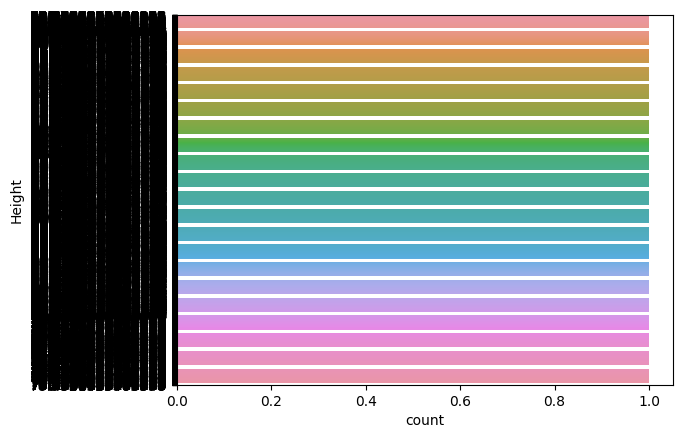

In [9]:
sns.countplot(df1,y = df1["Height"])

<Axes: >

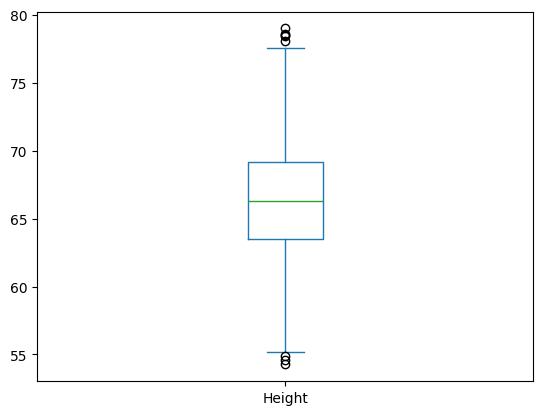

In [10]:
df1["Height"].plot(kind ='box')

<Axes: >

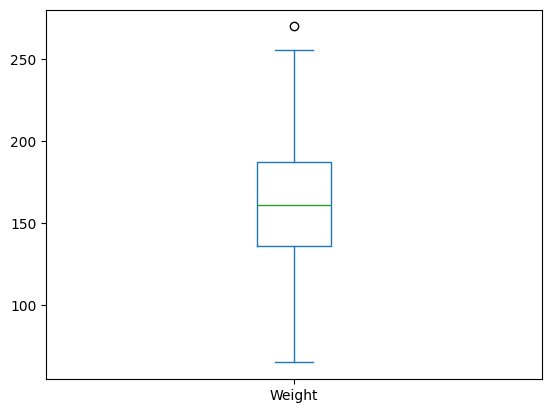

In [11]:
df1["Weight"].plot(kind ='box')

In [14]:
df1["Gender"].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

# Outlier Removal

In [16]:
df1["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [17]:
percentile25 = df1['Height'].quantile(0.25)
percentile75 = df1['Height'].quantile(0.75)
IQR = percentile75 -percentile25

In [18]:
IQR

5.668641245615746

In [19]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [20]:
df2 = df1[(df1['Height'] <=upper_limit) & (df1['Height'] >=lower_limit)]

In [21]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

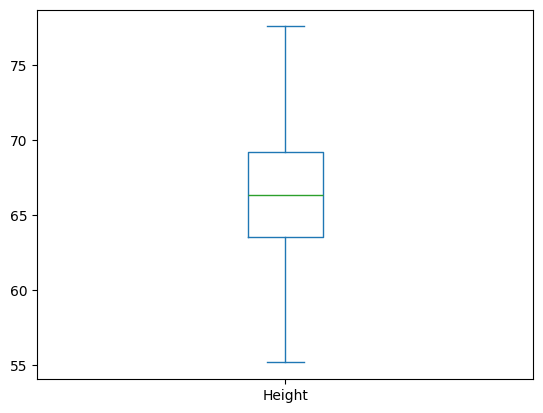

In [22]:
df2["Height"].plot(kind = "box")

thus oultier is removed from Height section

<Axes: >

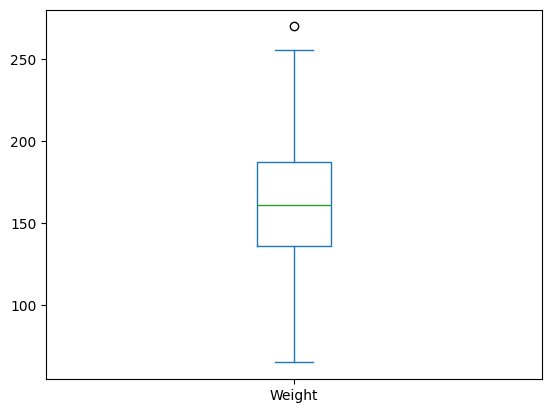

In [23]:
df1["Weight"].plot(kind ='box')

In [24]:
df1["Weight"].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [25]:
percentile25 = df1['Weight'].quantile(0.25)
percentile75 = df1['Weight'].quantile(0.75)
IQR = percentile75 -percentile25

In [26]:
IQR

51.35147356318197

In [27]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [28]:
df2 = df1[(df1['Weight'] <=upper_limit) & (df1['Weight'] >=lower_limit)]

In [29]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

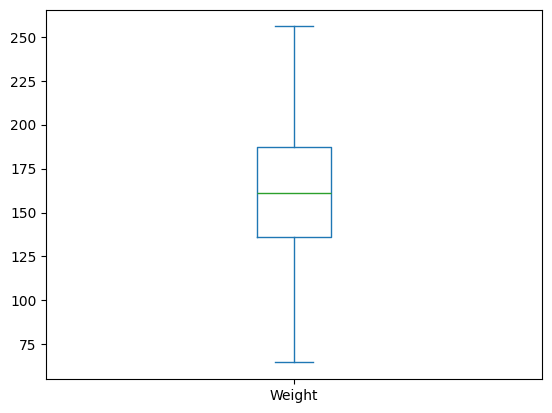

In [30]:
df2["Weight"].plot(kind ='box')

thus outlier is removed from weight column also

In [32]:
df2.shape

(9999, 3)

<Axes: >

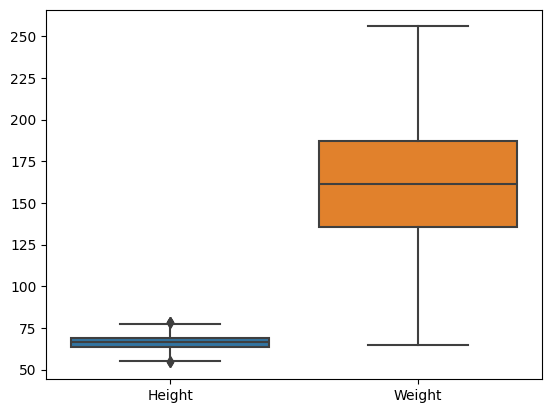

In [33]:
sns.boxplot(data =df2[["Height","Weight"]])

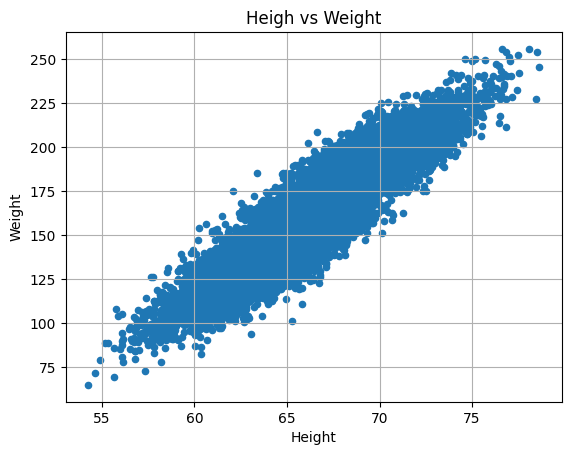

In [36]:
df2.plot.scatter(x="Height",y="Weight")
plt.title("Heigh vs Weight")
plt.grid()
plt.show()

# Feature Enginnering

thus here we have to add new column BMI for critical analysis 

The formula for BMI is weight in kilograms divided by height in meters squared.

In [38]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


as we dont know height weight unit so assuming it as kg and meter thus roughly caculating BMI

In [42]:
df2["BMI Calculate"]= ((df2["Weight"]/(df2["Height"]*df2["Height"]))*100)

In [43]:
df2

,Gender,Height,Weight,BMI Calculate
0,Male,73.847017,241.893563,4.435662
1,Male,68.781904,162.310473,3.430822
2,Male,74.110105,212.740856,3.873433
3,Male,71.730978,220.042470,4.276545
4,Male,69.881796,206.349801,4.225479
...,...,...,...,...
9995,Female,66.172652,136.777454,3.123615
9996,Female,67.067155,170.867906,3.798750
9997,Female,63.867992,128.475319,3.149584
9998,Female,69.034243,163.852461,3.438142


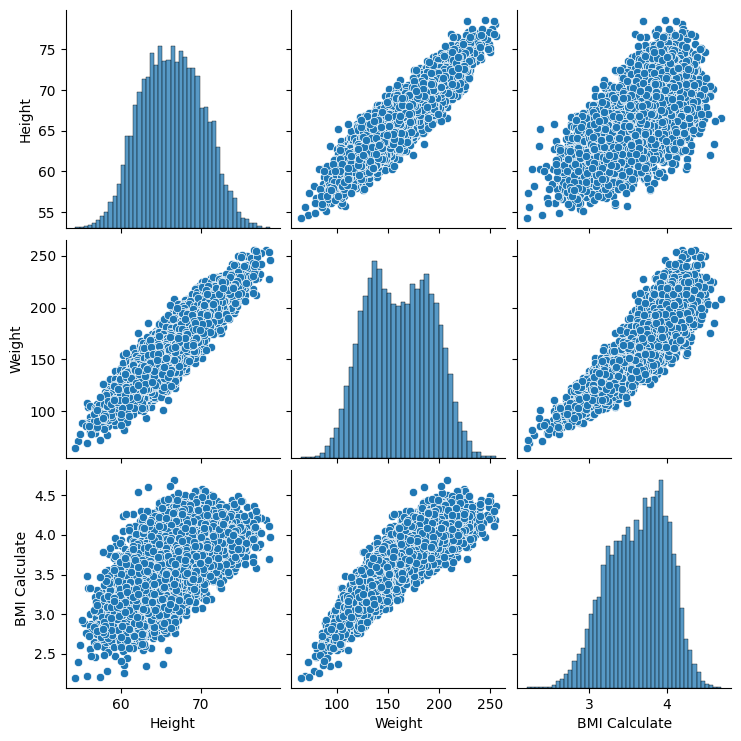

In [44]:
sns.pairplot(df2)

In [47]:
df2["BMI Calculate"].describe()

count    9999.000000
mean        3.623394
std         0.383105
min         2.197331
25%         3.337471
50%         3.660120
75%         3.919702
max         4.697704
Name: BMI Calculate, dtype: float64

# Encoding

Convert Gender to number: Convert all categorical values (text values) to numerical, in this case convert gender variable to O for male and 1 for female.
LabelEncoder is used for this purpose.

In [48]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df2['Gender']= label_encoder.fit_transform(df2['Gender']) 

df2['Gender'].unique() 

array([1, 0])

In [49]:
df2

,Gender,Height,Weight,BMI Calculate
0,1,73.847017,241.893563,4.435662
1,1,68.781904,162.310473,3.430822
2,1,74.110105,212.740856,3.873433
3,1,71.730978,220.042470,4.276545
4,1,69.881796,206.349801,4.225479
...,...,...,...,...
9995,0,66.172652,136.777454,3.123615
9996,0,67.067155,170.867906,3.798750
9997,0,63.867992,128.475319,3.149584
9998,0,69.034243,163.852461,3.438142


In [50]:
df2["Gender"].value_counts()

Gender
0    5000
1    4999
Name: count, dtype: int64